Based on https://www.audiosciencereview.com/forum/index.php?threads/arbitrary-shape-room-mode-simulator.20805/

Speed of sound in m/s

In [1]:
c = 343.0;

'Ω' is the domain, which in this case is the room. It is a polygon defined by its vertices.

In [14]:
leftFrontLength = 2.5781;
leftBackLength = 2.7559;
frontWidth = 3.6957;
backWidth = 3.95605;
seating = 4.07035;

Ω = Polygon[{
    {0, 0}, 
    {0, leftBackLength},
    {backWidth-frontWidth, leftBackLength},
    {backWidth-frontWidth, leftBackLength+leftFrontLength},
    {backWidth, leftBackLength+leftFrontLength},
    {backWidth, 0},
    {0, 0}
}];

-Graphics-
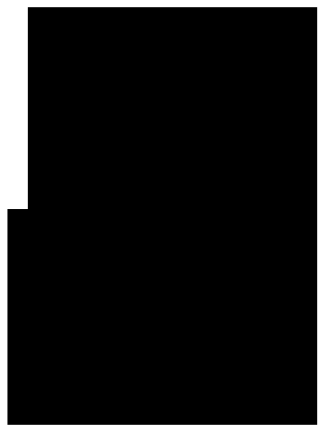

In [7]:
Graphics[Ω, ImageSize -> Small]

This line does all the computations. It numerically computes the eigenvalues (related to room mode frequencies) and eigenfunctions (room mode shapes). In this example the first 20 modes are requested.

In [8]:
{λ, eigfuns} = NDEigensystem[{-Laplacian[{u[x,y]}, {x,y}]}, u[x,y], Element[{x,y}, Ω], 20];

The returned eigenvalues λ are the square of the acoustic wavenumbers. This line convert them into frequencies in Hz.

In [9]:
freqs = c * Sqrt[λ] / (2*Pi);

The last two statements are to display the results. The first set of figures shows the mode shape in 3D. The second set shows the contour plots from top so the mode peak locations are easier to see. The reds and greens are locations when the effects of the mode are strong. The white areas are where it is unaffected the nulls.

{-Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, 
 
>   -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, 
 
>   -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, -Graphics3D-, 
 
>   -Graphics3D-, -Graphics3D-}
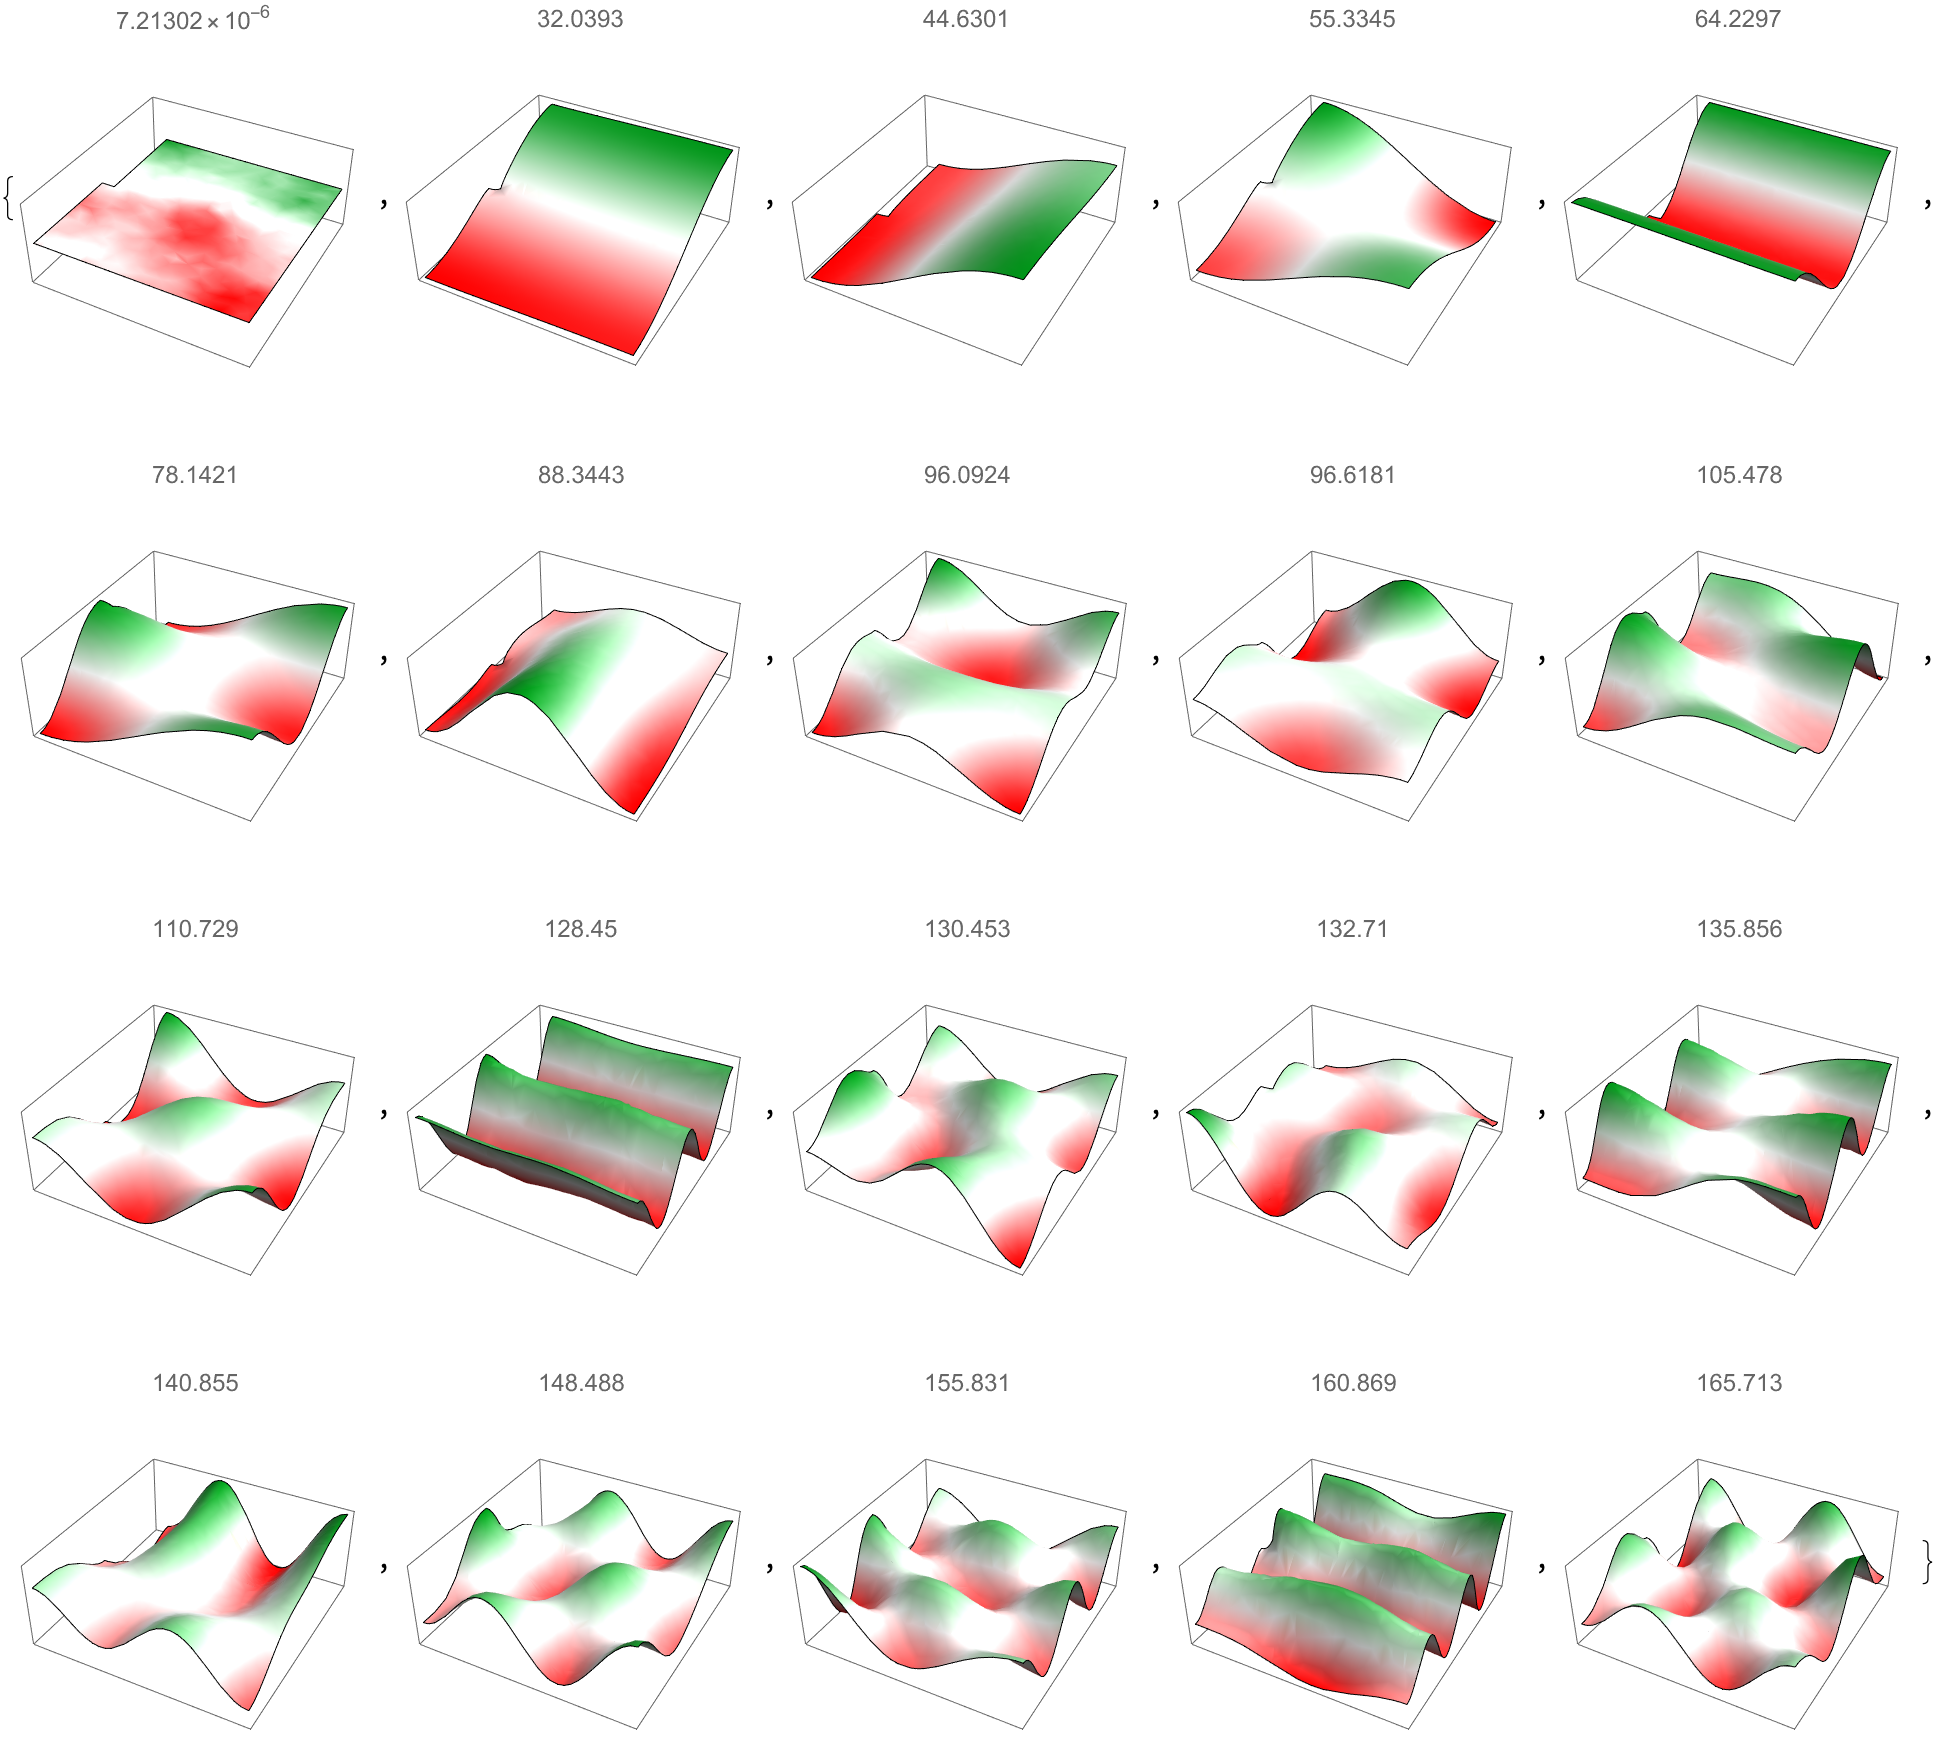

In [10]:
Table[Plot3D[eigfuns[[i]], {x, y} \[Element] Ω, 
  PlotRange -> All, PlotLabel -> freqs[[i]], 
  PlotTheme -> {"Minimal"}, Axes -> None,
                                
  ColorFunction -> ColorData["RedGreenSplit"], 
  PerformanceGoal -> "Quality"],
             {i, Length[freqs]}]

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}
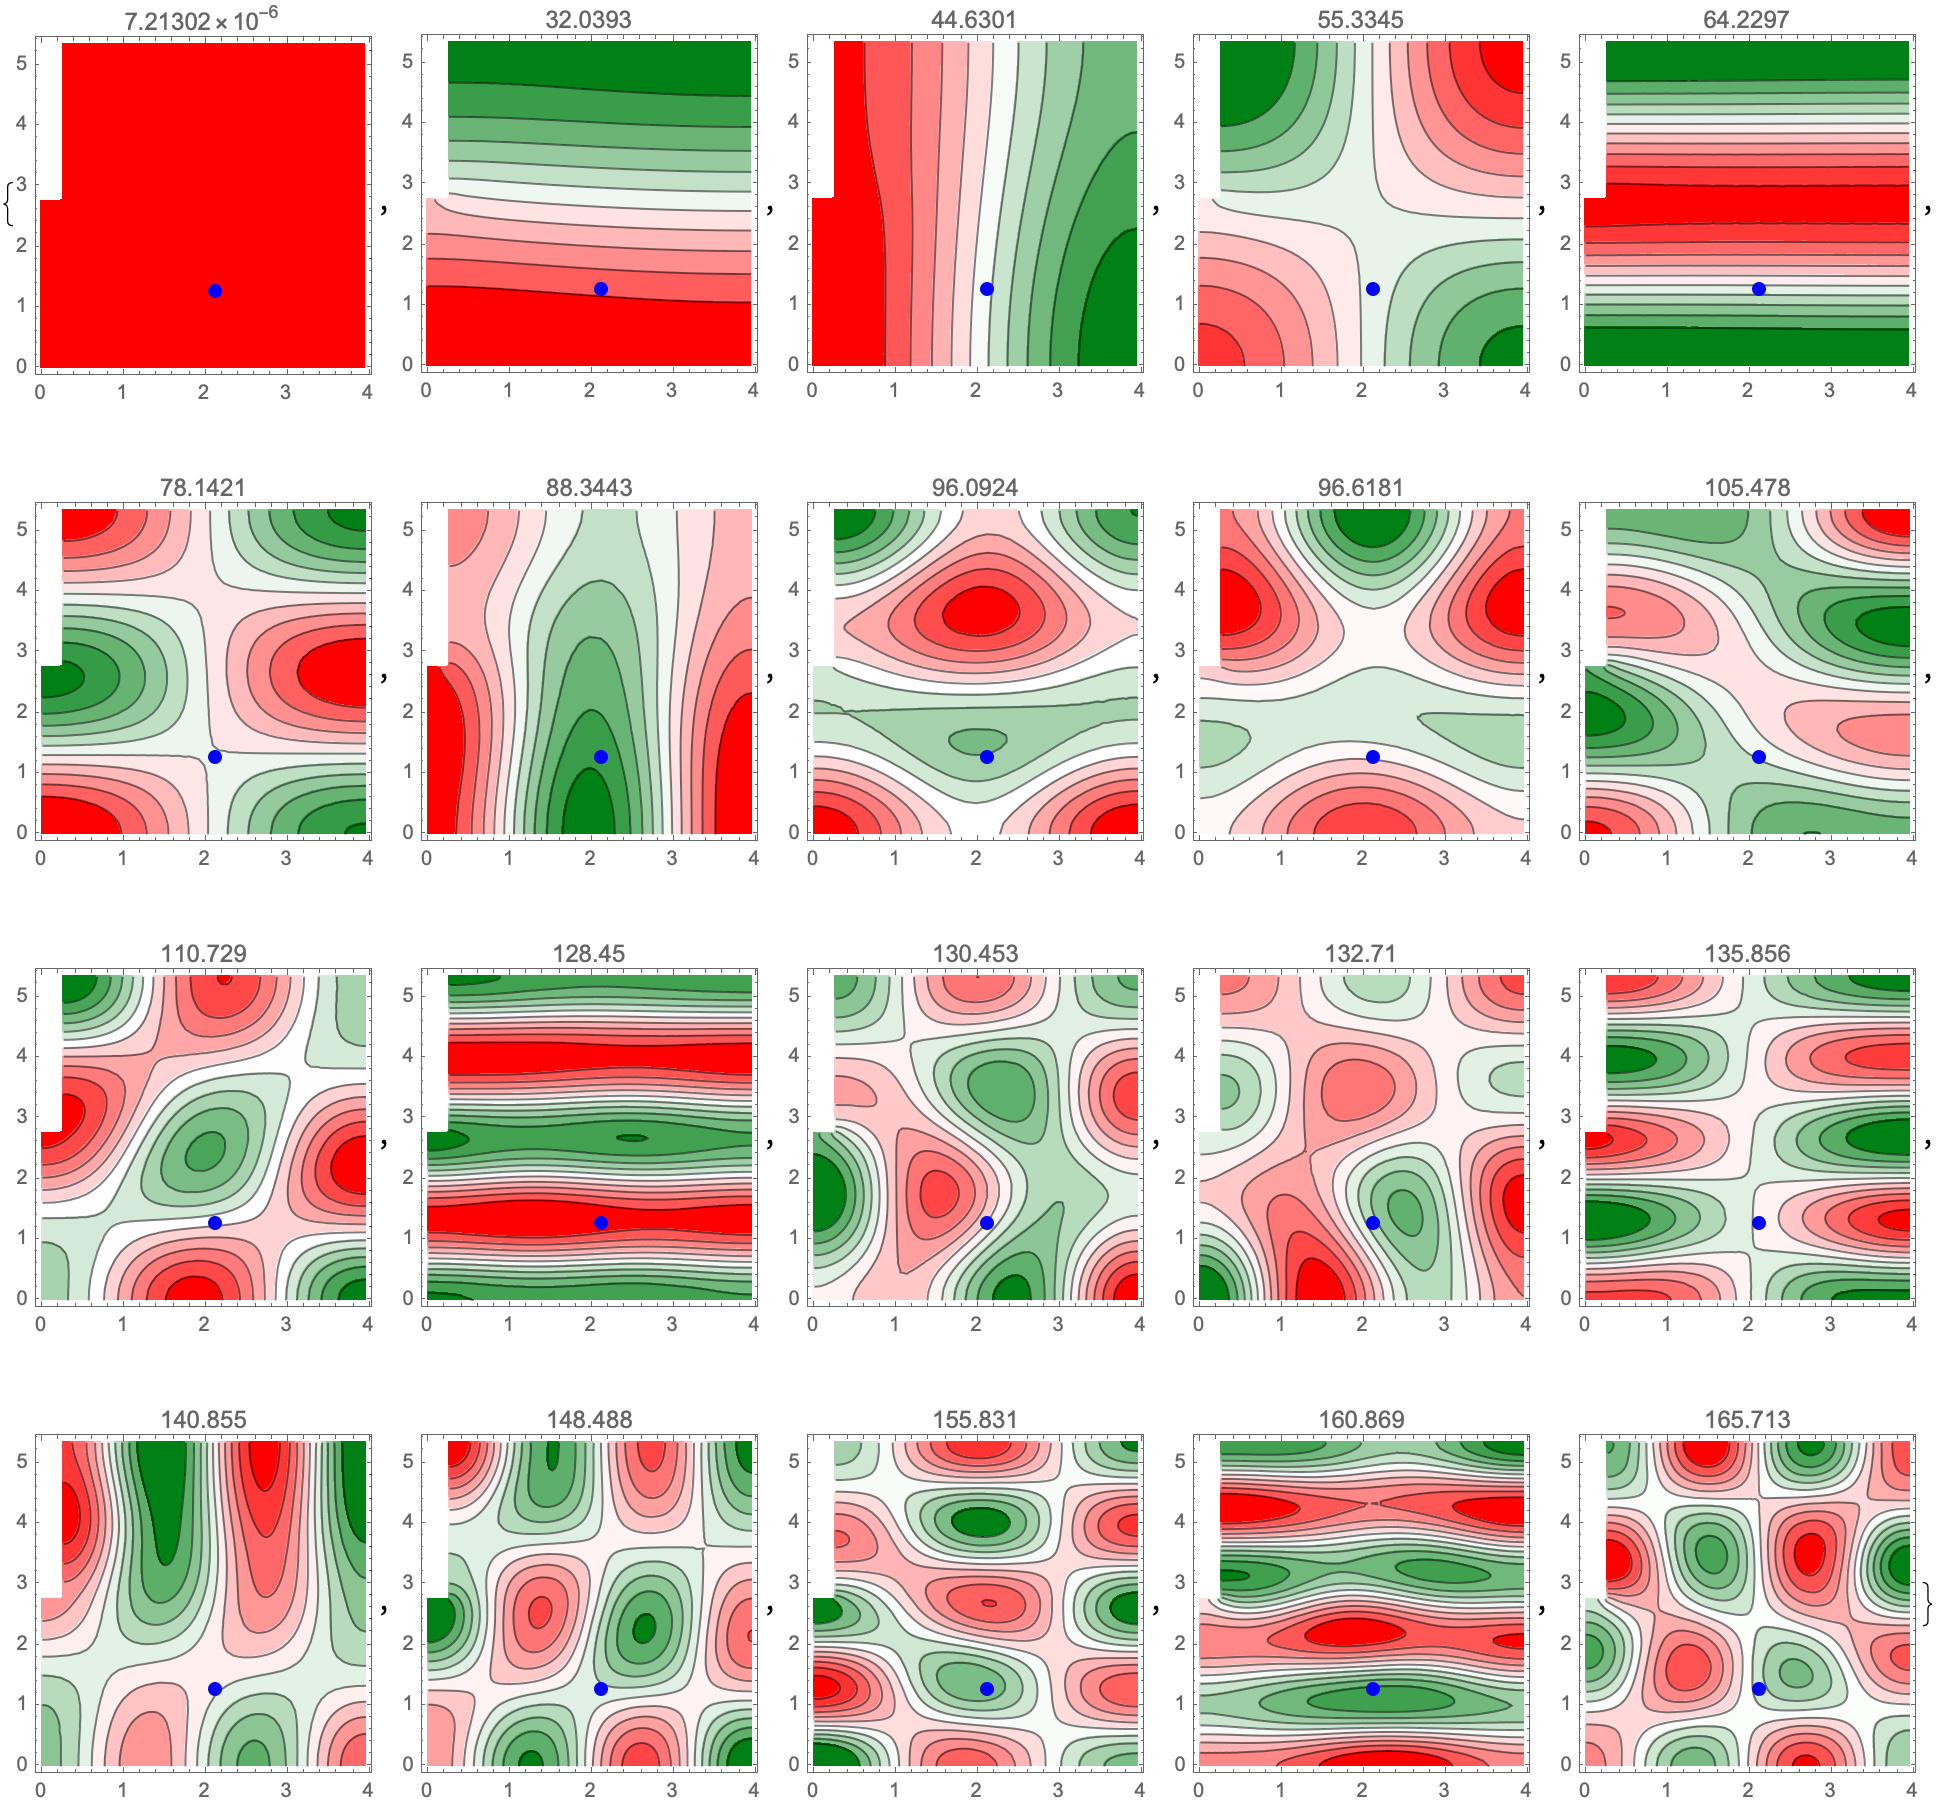

In [20]:
Table[ContourPlot[eigfuns[[i]], {x, y} \[Element] Ω, 
  PlotRange -> All, PlotLabel -> freqs[[i]], 
  Epilog -> {Green, PointSize@Large, Point[{frontWidth/2+backWidth-frontWidth, leftFrontLength+leftBackLength-seating}]},
  Contours -> 10,
                             
  ColorFunction -> ColorData["RedGreenSplit"], 
  PerformanceGoal -> "Quality"],
             {i, Length[freqs]}]